In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap # needs python 3.8?
import sys # to check python version
import os
import glob
import datetime as dt

### note: remove zeros from training ds and replace them with -999 flag

In [2]:
t1 = dt.datetime.now()

In [3]:
# check python version
sys.version

'3.9.7 (default, Sep 16 2021, 08:50:36) \n[Clang 10.0.0 ]'

In [4]:
# path to training dataset

trainDS_dir = "/Users/ehsanmos/Documents/RnD/MISR_lab/ML_research/training_dataset"
trainDS_csv = "training_dataset_myMethod_averaged_april_2016_9cam3bands_pandasMethod_finalDS_forML_withCount_1000samples.csv"


In [5]:
# load input training dataset

ds_fp = os.path.join(trainDS_dir, trainDS_csv)
os.path.isfile(ds_fp)

True

In [6]:
# label output file

name_tag = 'insample_'
date_tag = 'lon230_231_'
output_filename = name_tag+date_tag+trainDS_csv.split('.')[0]+'.csv'
output_filename

'insample_lon230_231_training_dataset_myMethod_averaged_april_2016_9cam3bands_pandasMethod_finalDS_forML_withCount_1000samples.csv'

In [7]:
# read data

ds_3cam = pd.read_csv(ds_fp, engine='python')#, dtype={'An_r':np.float64})#, encoding= 'unicode_escape')

In [8]:
# check dtypes after reading dataset

ds_3cam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   path                57 non-null     float64
 1   orbit               57 non-null     float64
 2   block               57 non-null     float64
 3   line                57 non-null     float64
 4   sample              57 non-null     float64
 5   count               57 non-null     float64
 6   lat                 57 non-null     float64
 7   lon                 57 non-null     float64
 8   Da_r                57 non-null     float64
 9   Ca_r                57 non-null     float64
 10  Ba_r                57 non-null     float64
 11  Aa_r                57 non-null     float64
 12  An_r                57 non-null     float64
 13  An_g                57 non-null     float64
 14  An_b                57 non-null     float64
 15  An_nir              57 non-null     float64
 16  Af_r      

In [9]:
# confirm dtypes after reading dataset

ds_3cam = ds_3cam.astype({"path":int,"orbit":int,"block":int,"line":int,"sample":int})
ds_3cam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   path                57 non-null     int64  
 1   orbit               57 non-null     int64  
 2   block               57 non-null     int64  
 3   line                57 non-null     int64  
 4   sample              57 non-null     int64  
 5   count               57 non-null     float64
 6   lat                 57 non-null     float64
 7   lon                 57 non-null     float64
 8   Da_r                57 non-null     float64
 9   Ca_r                57 non-null     float64
 10  Ba_r                57 non-null     float64
 11  Aa_r                57 non-null     float64
 12  An_r                57 non-null     float64
 13  An_g                57 non-null     float64
 14  An_b                57 non-null     float64
 15  An_nir              57 non-null     float64
 16  Af_r      

In [10]:
# ds_3cam.rename(columns={"mean_ATM_roughness":"rms"}, inplace=True)
# ds_3cam.columns

In [11]:
ds_3cam.head()

,path,orbit,block,line,sample,count,lat,lon,Da_r,Ca_r,...,Aa_r,An_r,An_g,An_b,An_nir,Af_r,Bf_r,Cf_r,Df_r,mean_ATM_roughness
0,0,0,0,0,0,1.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,152,86922,9,75,1205,4.0,74.422271,215.544237,1.032030,0.843970,...,0.624330,0.597250,0.476420,0.767230,-99.0,0.701050,0.926720,1.390070,2.155820,5.217500
2,152,86922,9,74,1205,15.0,74.421802,215.546115,1.033530,0.836450,...,0.615300,0.589730,0.483930,0.765730,-99.0,0.699550,0.946270,1.396090,2.155820,6.237333
3,152,86922,9,74,1206,37.0,74.420161,215.541475,1.039387,0.833521,...,0.612371,0.585342,0.479552,0.765730,-99.0,0.703938,0.931636,1.384385,2.129472,6.747568
4,152,86922,9,74,1207,26.0,74.418225,215.535986,1.042444,0.839692,...,0.614032,0.583999,0.473873,0.765788,-99.0,0.696829,0.926546,1.367394,2.112479,8.174231


In [12]:
ds_3cam = ds_3cam.drop(index=0, axis=0)

In [13]:
ds_3cam['lat'].max()

74.4222715

In [14]:
# determine range to print based on min, max lat and lon of the data
# is it necessary?
# xlon = ds_3cam[' lon']
# ylat = ds_3cam[' lat']

xlon_series = ds_3cam['lon']
ylat_series = ds_3cam['lat']
# xlon
ylat_series[1]

74.4222715

In [15]:
margin = 0 # buffer to add to the range; units? m or km?

lat_min = min(ylat_series) - margin
lat_max = max(ylat_series) + margin
lon_min = min(xlon_series) - margin
lon_max = max(xlon_series) + margin


# note: lat & lon are in degrees; map projection?
print(lat_min)
print(lat_max)
print(lon_min)
print(lon_max)

74.35561299999999
74.4222715
215.374061
215.546115


In [16]:
# for plotting needed 
from itertools import chain
def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, num=7))
    lons = m.drawmeridians(np.linspace(-180, 180, num=18))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

In [17]:
# # ref: https://stackoverflow.com/questions/44488167/plotting-lat-long-points-using-basemap
# basemap = Basemap(llcrnrlon=lon_min,
#                     llcrnrlat=lat_min,
#                     urcrnrlon=lon_max,
#                     urcrnrlat=lat_max,
#                     lat_0=(lat_max - lat_min)/2,
#                     lon_0=(lon_max-lon_min)/2,
#                     projection='ortho',
#                     resolution = None,
#                     area_thresh=10000.,)

In [18]:
# basemap.shadedrelief()
# basemap.drawcoastlines(color='gray')
# basemap.drawcountries(color='gray')
# basemap.drawstates(color='gray')



# basemap.drawcoastlines()
# basemap.drawcountries()
# basemap.drawstates()
# basemap.drawmapboundary(fill_color='#46bcec')
# basemap.fillcontinents(color = 'white',lake_color='#46bcec')

In [19]:
# fig = plt.figure(figsize=(12, 12))

# basemap = Basemap(projection='ortho', resolution=None, lat_0=90, lon_0=180)

# # locations on map: convert lat and lon to map projection coordinates
# xlons, ylats = basemap(xlon, ylat)

# plt.plot(xlons, ylats, 'ok', markersize=1)

# # draw a circle on map on 60N  
# basemap.drawparallels([60], color='red') #, labels='test'????)
# plt.title('Study Region, 60N', fontsize=16)

# draw_map(basemap);

# how zoom to the region?

In [45]:
# needed for plotting
def make_the_map(XlonSet, YlatSet):
    
    fig = plt.figure(figsize=(12, 12))

    basemap = Basemap(projection='ortho', resolution=None, lat_0=90, lon_0=180)

    # locations on map: convert lat and lon to map projection coordinates
    xlons, ylats = basemap(XlonSet, YlatSet)

    plt.plot(xlons, ylats, 'ok', markersize=1)

    # draw a circle on map on 60N  
    basemap.drawparallels([60], color='red') #, labels='test'????)
    plt.title('Study Region, 60N', fontsize=16)

    draw_map(basemap);
    return 0;

0

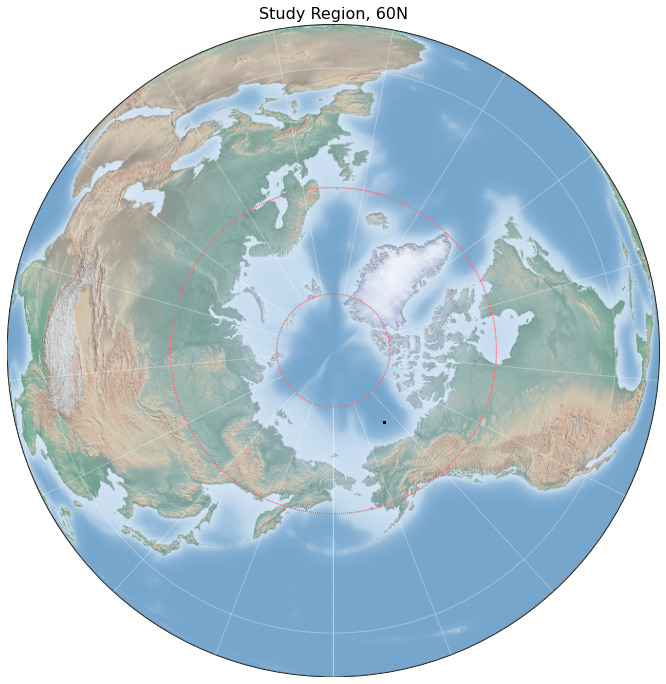

In [93]:
# run with oython >= 3.8 or install Basemap on Ubuntu

make_the_map(xlon_series, ylat_series)

In [47]:
# ds_3cam['orbit_start'].min()

In [22]:
# ds_3cam['orbit_start'].max()

## filter ATM locations

In [23]:
# extract transect by date
# filter for 19-april and then plot the transect for both my method and old method and then compare...


# transect = ds_3cam.loc[(ds_3cam['orbit_start'] >= '2016-04-17T00:00:00Z') & 
#                          (ds_3cam['orbit_start'] <= '2016-04-30T23:59:59Z')]  # should include T & Z?


In [24]:
# transect.head()

In [25]:
# transect['lon'].min()

In [26]:
# transect['lon'].max()

In [27]:
# extract transect by guessing longitudes


# transect = transect.loc[(transect[' lon'] > 230.0) & 
#                         (transect[' lon'] < 231.0)]
# transect.info()

## extract a subset, scatter points on map, and zoom to the area

In [16]:
# # input desired coordinates
# my_coords_xy = [xlon_series[1], ylat_series[1]]
# print(my_coords)


# # # How much to zoom from coordinates (in degrees)
# # zoom_scale = 1

# # # Setup the bounding box for the zoom and bounds of the map
# # bbox = [my_coords_xy[0]-zoom_scale, my_coords_xy[0]+zoom_scale,\
# #         my_coords_xy[1]-zoom_scale, my_coords_xy[1]+zoom_scale]

In [17]:
# plt.figure(figsize=(12,6))

# # Define the projection, scale, the corners of the map, and the resolution.
# m = Basemap(projection='merc',llcrnrlat=bbox[0],urcrnrlat=bbox[1],\
#             llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10,resolution='i')

In [25]:
# m = Basemap(projection='merc', \
#             llcrnrlat=-80, urcrnrlat=80, \
#             llcrnrlon=-180, urcrnrlon=180, \
#             lat_ts=20, \
#             resolution='c')

# m.bluemarble(scale=0.2)   # full scale will be overkill
# m.drawcoastlines(color='white', linewidth=0.2)  # add coastlines


# x, y = m(xlon_series, ylat_series)
# m.scatter(x, y, 10, marker='o', color='Red', zorder=3)

# plt.show()


# lon_0, lat_0 are the center point of the projection.
# resolution = 'l' means use low resolution coastlines.
m = Basemap(projection='ortho', lon_0=180, lat_0=90, resolution='i', llcrnrlat=80, urcrnrlat=90,\
llcrnrlon=100, urcrnrlon=150)

m.drawcoastlines()
m.fillcontinents(color='brown', lake_color='blue')


# draw parallels and meridians.
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,420.,60.))
m.drawmapboundary(fill_color='aqua')

x, y = m(xlon_series, ylat_series)

m.scatter(x, y, 10, marker='o', color='Red', zorder=3)

plt.title("Full Disk Orthographic Projection")
plt.show()

AttributeError: 'Basemap' object has no attribute '_height'

In [ ]:
# create a column as index and set that column as index to plot transect

# lon_subset['index'] = [i for i in range(len(lon_subset['lon']))]
transect.index = range(1,len(transect)+1)
transect.head()

# set that column as index
# lon_subset.set_index['index']

In [ ]:
# needed for plotting

xlon_subset = transect[' lon']
ylat_subset = transect[' lat']

In [ ]:
# run with python >= 3.8 or install Basemap on Ubuntu

make_the_map(xlon_subset, ylat_subset)

In [ ]:
# extract transect data & write it out


# output_path = home_dir
# output_file_fp = os.path.join(output_path, output_filename)
# transect.to_csv(output_file_fp)
# output_file_fp

In [ ]:
t2 = dt.datetime.now()
runtime = t2-t1
runtime